# data/mc plots

### Post-process Data and MC samples

- Sum all MC samples that belong to the same process
- Scale the number of events by the total sum of weights

In [1]:
# import utilities for post-process
import utils
import plotting

In [2]:
samples = {
    "qcd": [
        "QCD_PT-120to170",
        "QCD_PT-170to300",
        "QCD_PT-300to470",
        "QCD_PT-470to600",
        "QCD_PT-600to800",
        "QCD_PT-800to1000",
        "QCD_PT-1000to1400",
        "QCD_PT-1400to1800",
        "QCD_PT-1800to2400",
        "QCD_PT-2400to3200",
        "QCD_PT-3200",
    ],
    "qcd-ht": [
        # "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
        "QCD_HT-2000",
    ],
    "qcdb-ht": [
        "QCDB_HT-40to100",
        "QCDB_HT-100to200",
        "QCDB_HT-200to400",
        "QCDB_HT-400to600",
        "QCDB_HT-600to800",
        "QCDB_HT-800to1000",
        "QCDB_HT-1000to1500",
        "QCDB_HT-1500to2000",
        "QCDB_HT-2000",
    ],
    "data": [
        "Run2022F",
        "Run2022G",
    ],
    "ttbar": [
        "TTtoLNu2Q",
        "TTto4Q",
        "TTto2L2Nu",
    ],
    "gghtobb": [
        "GluGluHto2B_PT-200_M-125",
    ],
    "vbfhtobb": [
        "VBFHto2B_M-125_dipoleRecoilOn",
    ],
    "vhtobb": [
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "ZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    ],
    "hh4b": [
        "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG",
    ],
    "tthtobb": [
        "ttHto2B_M-125",
    ],
    "diboson": [
        "ZZ",
        "WW",
        "WZ",
    ],
    "vjets": [
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-400to600",
        "Wto2Q-3Jets_HT-600to800",
        "Wto2Q-3Jets_HT-800",
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-400to600",
        "Zto2Q-4Jets_HT-600to800",
        "Zto2Q-4Jets_HT-800",
    ],
}

samples_to_use = {
    s: samples[s]
    for s in [
        "data",
        # "qcd",
        "qcd-ht",
        "ttbar",
        "hh4b",
        "vjets",
        "diboson",
        "gghtobb",
    ]
}

# define dictionary with directories of files (this can be configured in a yaml file later in the script)

# this is the directory to the files
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/skimmer/Oct19wSelection"
dirs = {path_to_dir: samples_to_use}
year = "2022EE"

In [3]:
# filters are sequences of strings that can be used to place a selection or mask in the parquet files
# e.g. https://github.com/rkansal47/HHbbVV/blob/main/src/HHbbVV/postprocessing/postprocessing.py#L80
filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetMsd', '1')", ">=", 60),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
        # ("('AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35', '0')", "==", 1),
    ],
    # [
    #    ("('ak8FatJetPt', '0')", ">=", 300),
    #    ("('ak8FatJetPt', '1')", ">=", 300),
    #    ("('ak8FatJetMsd', '0')", ">=", 60),
    #    ("('ak8FatJetMsd', '1')", ">=", 60),
    # ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
    # ("('AK8PFJet425_SoftDropMass40', '0')", "==", 1),
    # ]
]

# columns to load
# the parquet files are too big so we can only load a few columns at a time without consumming much memory
load_columns = [
    ("weight", 1),
    # ("ak8FatJetPt", 2),
    ("ak8FatJetMsd", 2),
    # ("ak8FatJetPNetMass", 2),
    # ("ak8FatJetPNetXbb", 2),
]
# reformat into ("column name", "idx") format for reading multiindex columns
columns = []
for key, num_columns in load_columns:
    for i in range(num_columns):
        columns.append(f"('{key}', '{i}')")

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters, columns),
    }

Loading Run2022F


Loading Run2022G
Loading QCD_HT-1000to1200


Loading QCD_HT-1500to2000
Loading QCD_HT-2000
Loading QCD_HT-200to400
Loading QCD_HT-400to600
Loading QCD_HT-600to800
Loading QCD_HT-800to1000
Loading TTto2L2Nu
Loading TTto4Q
Loading TTtoLNu2Q
Loading GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG
Loading Wto2Q-3Jets_HT-200to400
Loading Wto2Q-3Jets_HT-400to600
Loading Wto2Q-3Jets_HT-600to800
Loading Wto2Q-3Jets_HT-800
Loading Zto2Q-4Jets_HT-200to400
Loading Zto2Q-4Jets_HT-400to600
Loading Zto2Q-4Jets_HT-600to800
Loading Zto2Q-4Jets_HT-800
Loading WW
Loading WZ
Loading ZZ
Loading GluGluHto2B_PT-200_M-125


In [4]:
# this will be the weight that will be stored in the eventsDict once the utils.loadSamples function is done
weight_key = ["weight"]

In [5]:
samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].columns)
print(f"Keys in events_dict {keys_loaded}")

Keys in events_dict [('weight', 0), ('ak8FatJetMsd', 0), ('ak8FatJetMsd', 1)]


In [6]:
vars_to_plot = [
    # "ak8FatJetPt0",
    # "ak8FatJetPt1",
    "ak8FatJetMsd0",
    "ak8FatJetMsd1",
    # "ak8FatJetPNetMass0",
    # "DijetMass",
    # "ak8FatJetPNetXbb0",
]

In [7]:
# define ShapeVar (label and bins for a given variable)
from utils import ShapeVar

var_to_shapevar = {
    # var must match key in events dictionary (i.e. as saved in parquet file)
    "DijetMass": ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    "ak8FatJetPt0": ShapeVar(
        var="ak8FatJetPt0", label=r"$p_T^0$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetPt1": ShapeVar(
        var="ak8FatJetPt1", label=r"$p_T^1$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetMsd0": ShapeVar(var="ak8FatJetMsd0", label=r"$m_{SD}^{0}$ (GeV)", bins=[36, 20, 300]),
    "ak8FatJetMsd1": ShapeVar(var="ak8FatJetMsd1", label=r"$m_{SD}^{1}$ (GeV)", bins=[36, 20, 300]),
    "ak8FatJetPNetMass0": ShapeVar(
        var="ak8FatJetPNetMass0", label=r"$m_{reg}^{0}$ (GeV)", bins=[20, 50, 250]
    ),
    "ak8FatJetPNetXbb0": ShapeVar(
        var="ak8FatJetPNetXbb0",
        label=r"$TX_{bb}^{0}$",
        bins=[50, 0.0, 1],
    ),
}

In [8]:
# make a histogram
hists = {}
for var in vars_to_plot:
    shape_var = var_to_shapevar[var]
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key=weight_key,
            selection=None,
        )

fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([139.875, 185.   ,  87.5  , ...,  84.125, 187.25 , 138.25 ])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([203.75  , 149.25  , 110.0625, ..., 119.3125, 139.625 ,  84.9375])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([ 60.21875, 149.625  , 163.625  , ..., 133.     , 157.375  ,
       102.4375 ])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([124.875, 152.875, 122.   , ..., 130.5  , 121.   , 124.75 ])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([120.8125, 120.625 , 132.75  , ..., 194.5   ,  68.5   , 102.375 ])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([ 82.3125,  84.25  ,  93.9375, ...,  80.4375,  97.375 , 106.5   ])}
fill var  ak8FatJetMsd0
{'ak8FatJetMsd0': array([121.4375, 142.    , 122.5625, 122.    , 115.    , 121.9375,
       141.    , 155.25  , 137.625 , 125.125 , 106.5625, 134.75  ,
       131.    ,  98.3125, 104.625 , 135.    , 119.875 , 142.75  ,
       136.75  , 153.125 , 116.125 , 147.5   , 126.    , 131

In [9]:
hists["ak8FatJetMsd0"][{"Sample": "data"}]

Hist(Regular(36, 20, 300, name='ak8FatJetMsd0', label='$m_{SD}^{0}$ (GeV)'), storage=Weight()) # Sum: WeightedSum(value=382124, variance=382124) (WeightedSum(value=383419, variance=383419) with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0a581eabb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

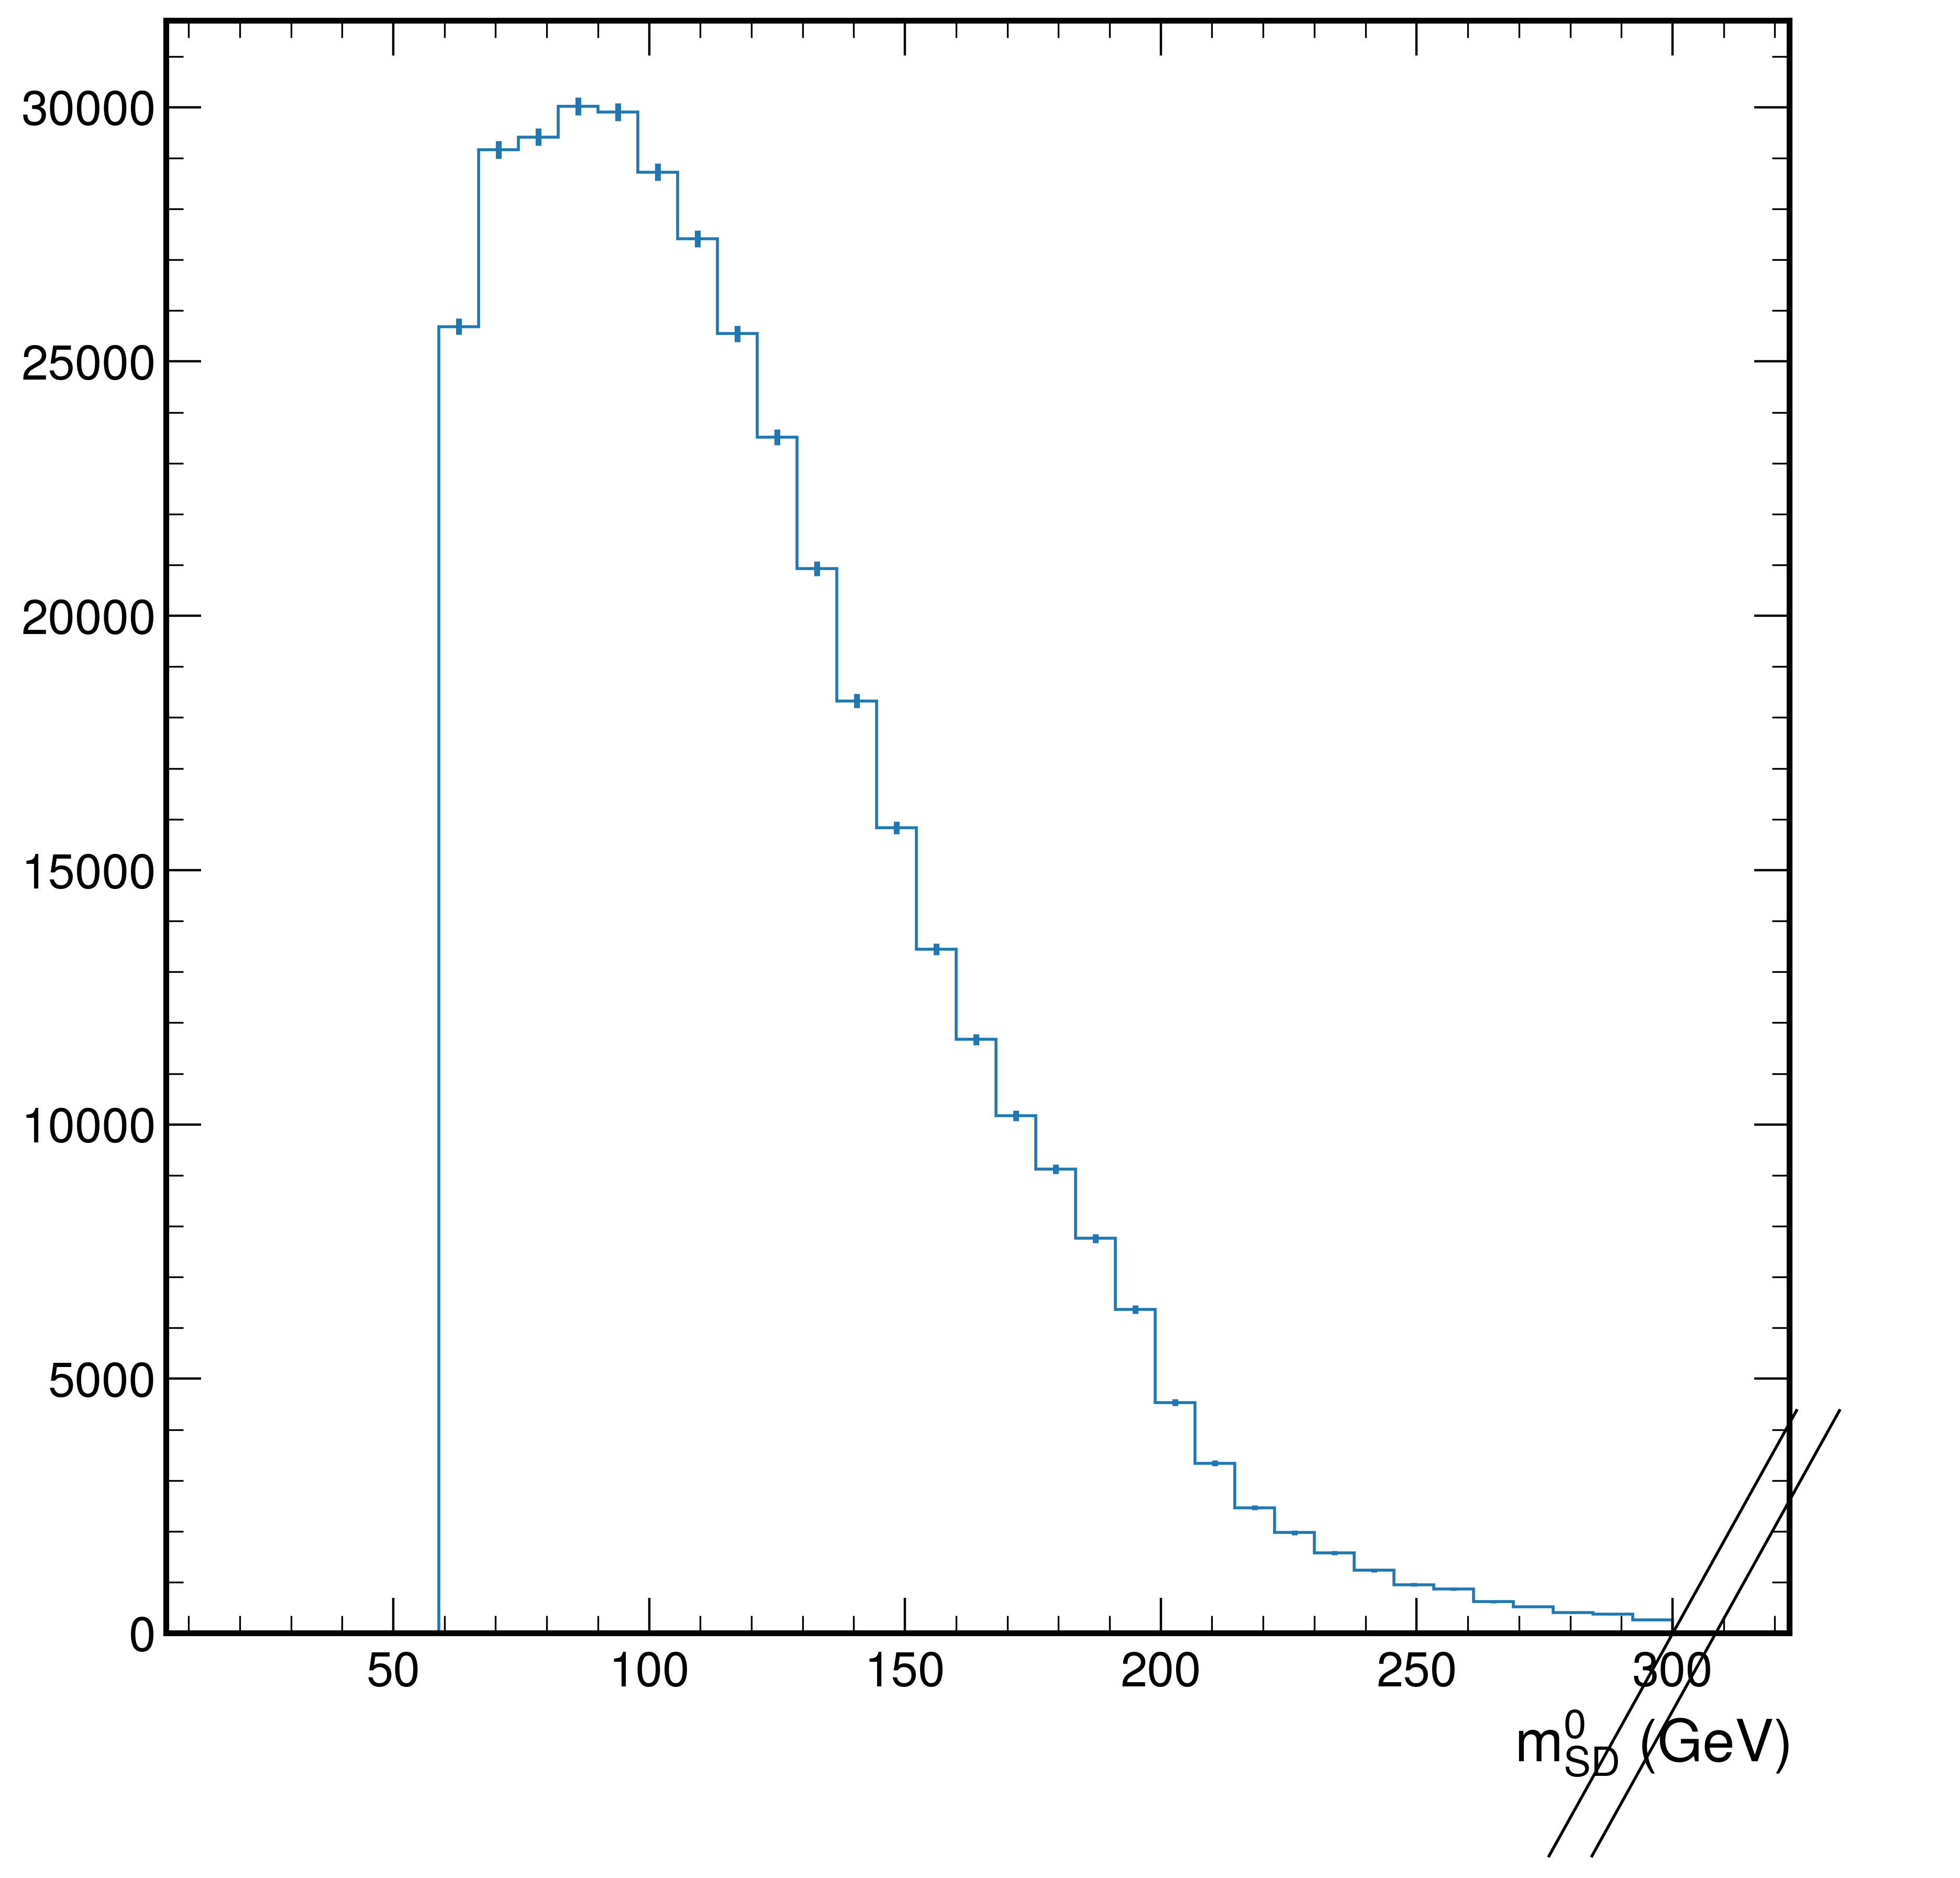

In [10]:
hists["ak8FatJetMsd0"][{"Sample": "data"}].plot1d()

Will plot ak8FatJetMsd0 histogram
Will plot ak8FatJetMsd1 histogram


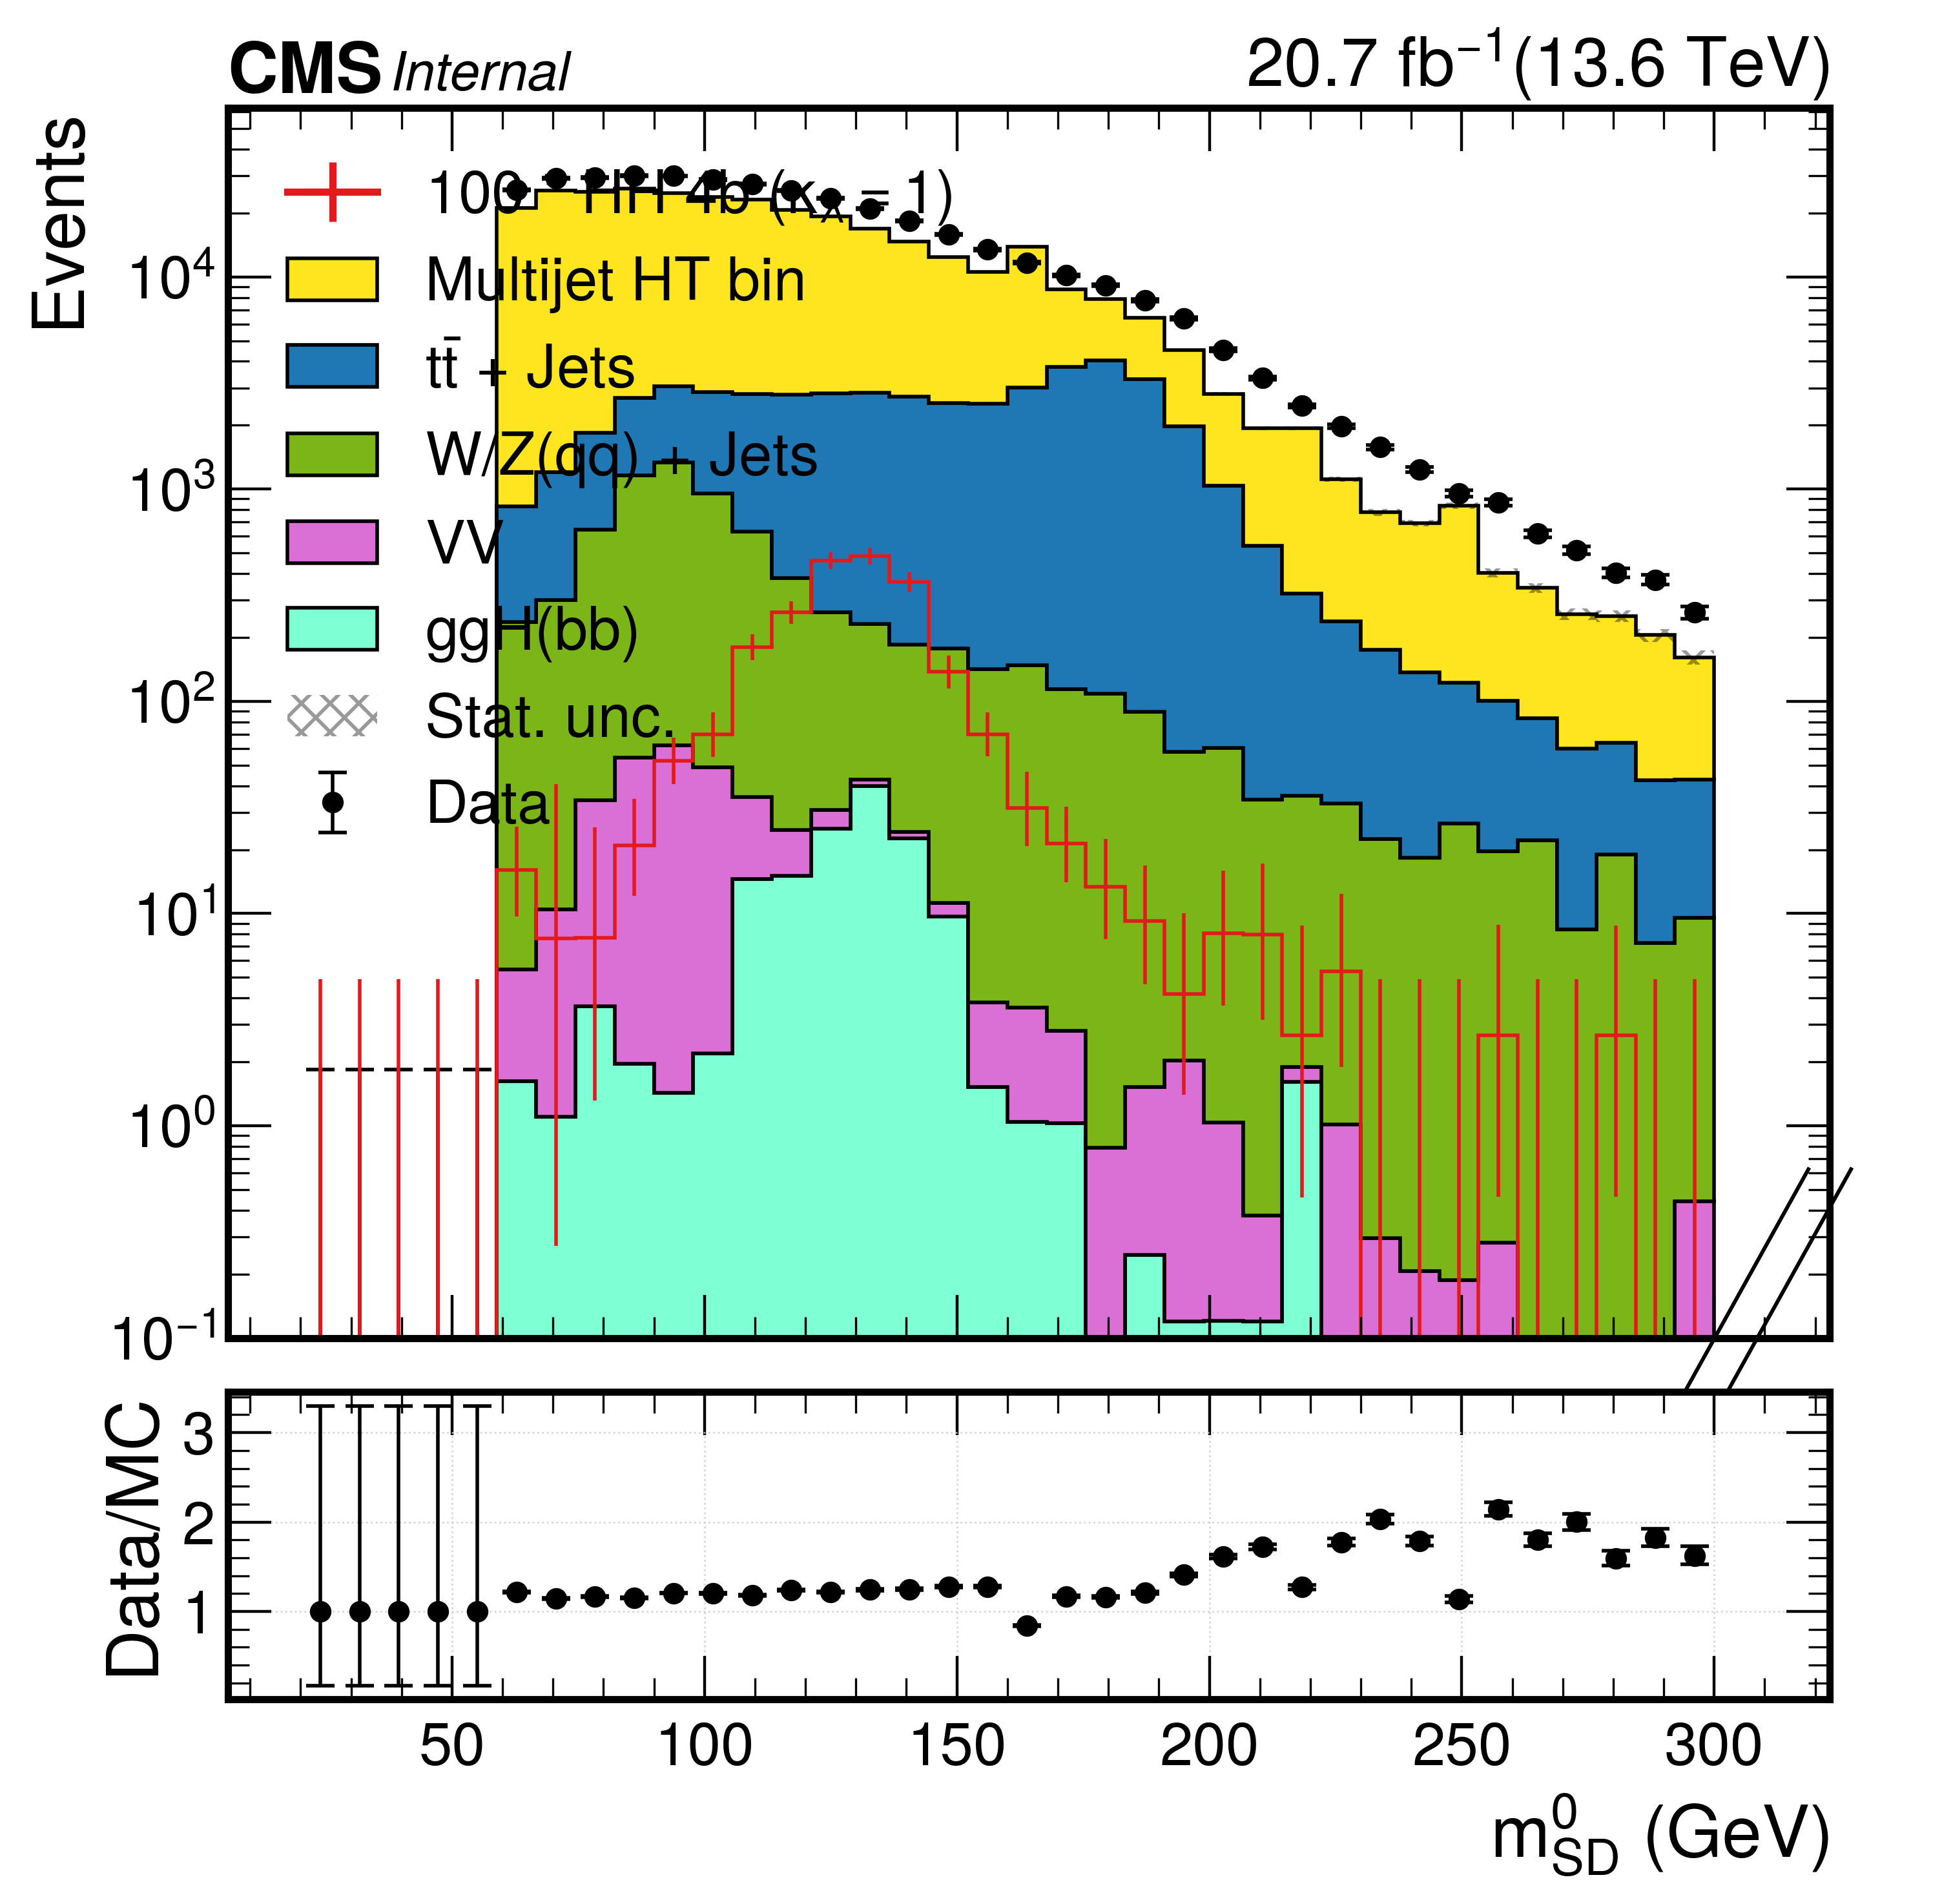

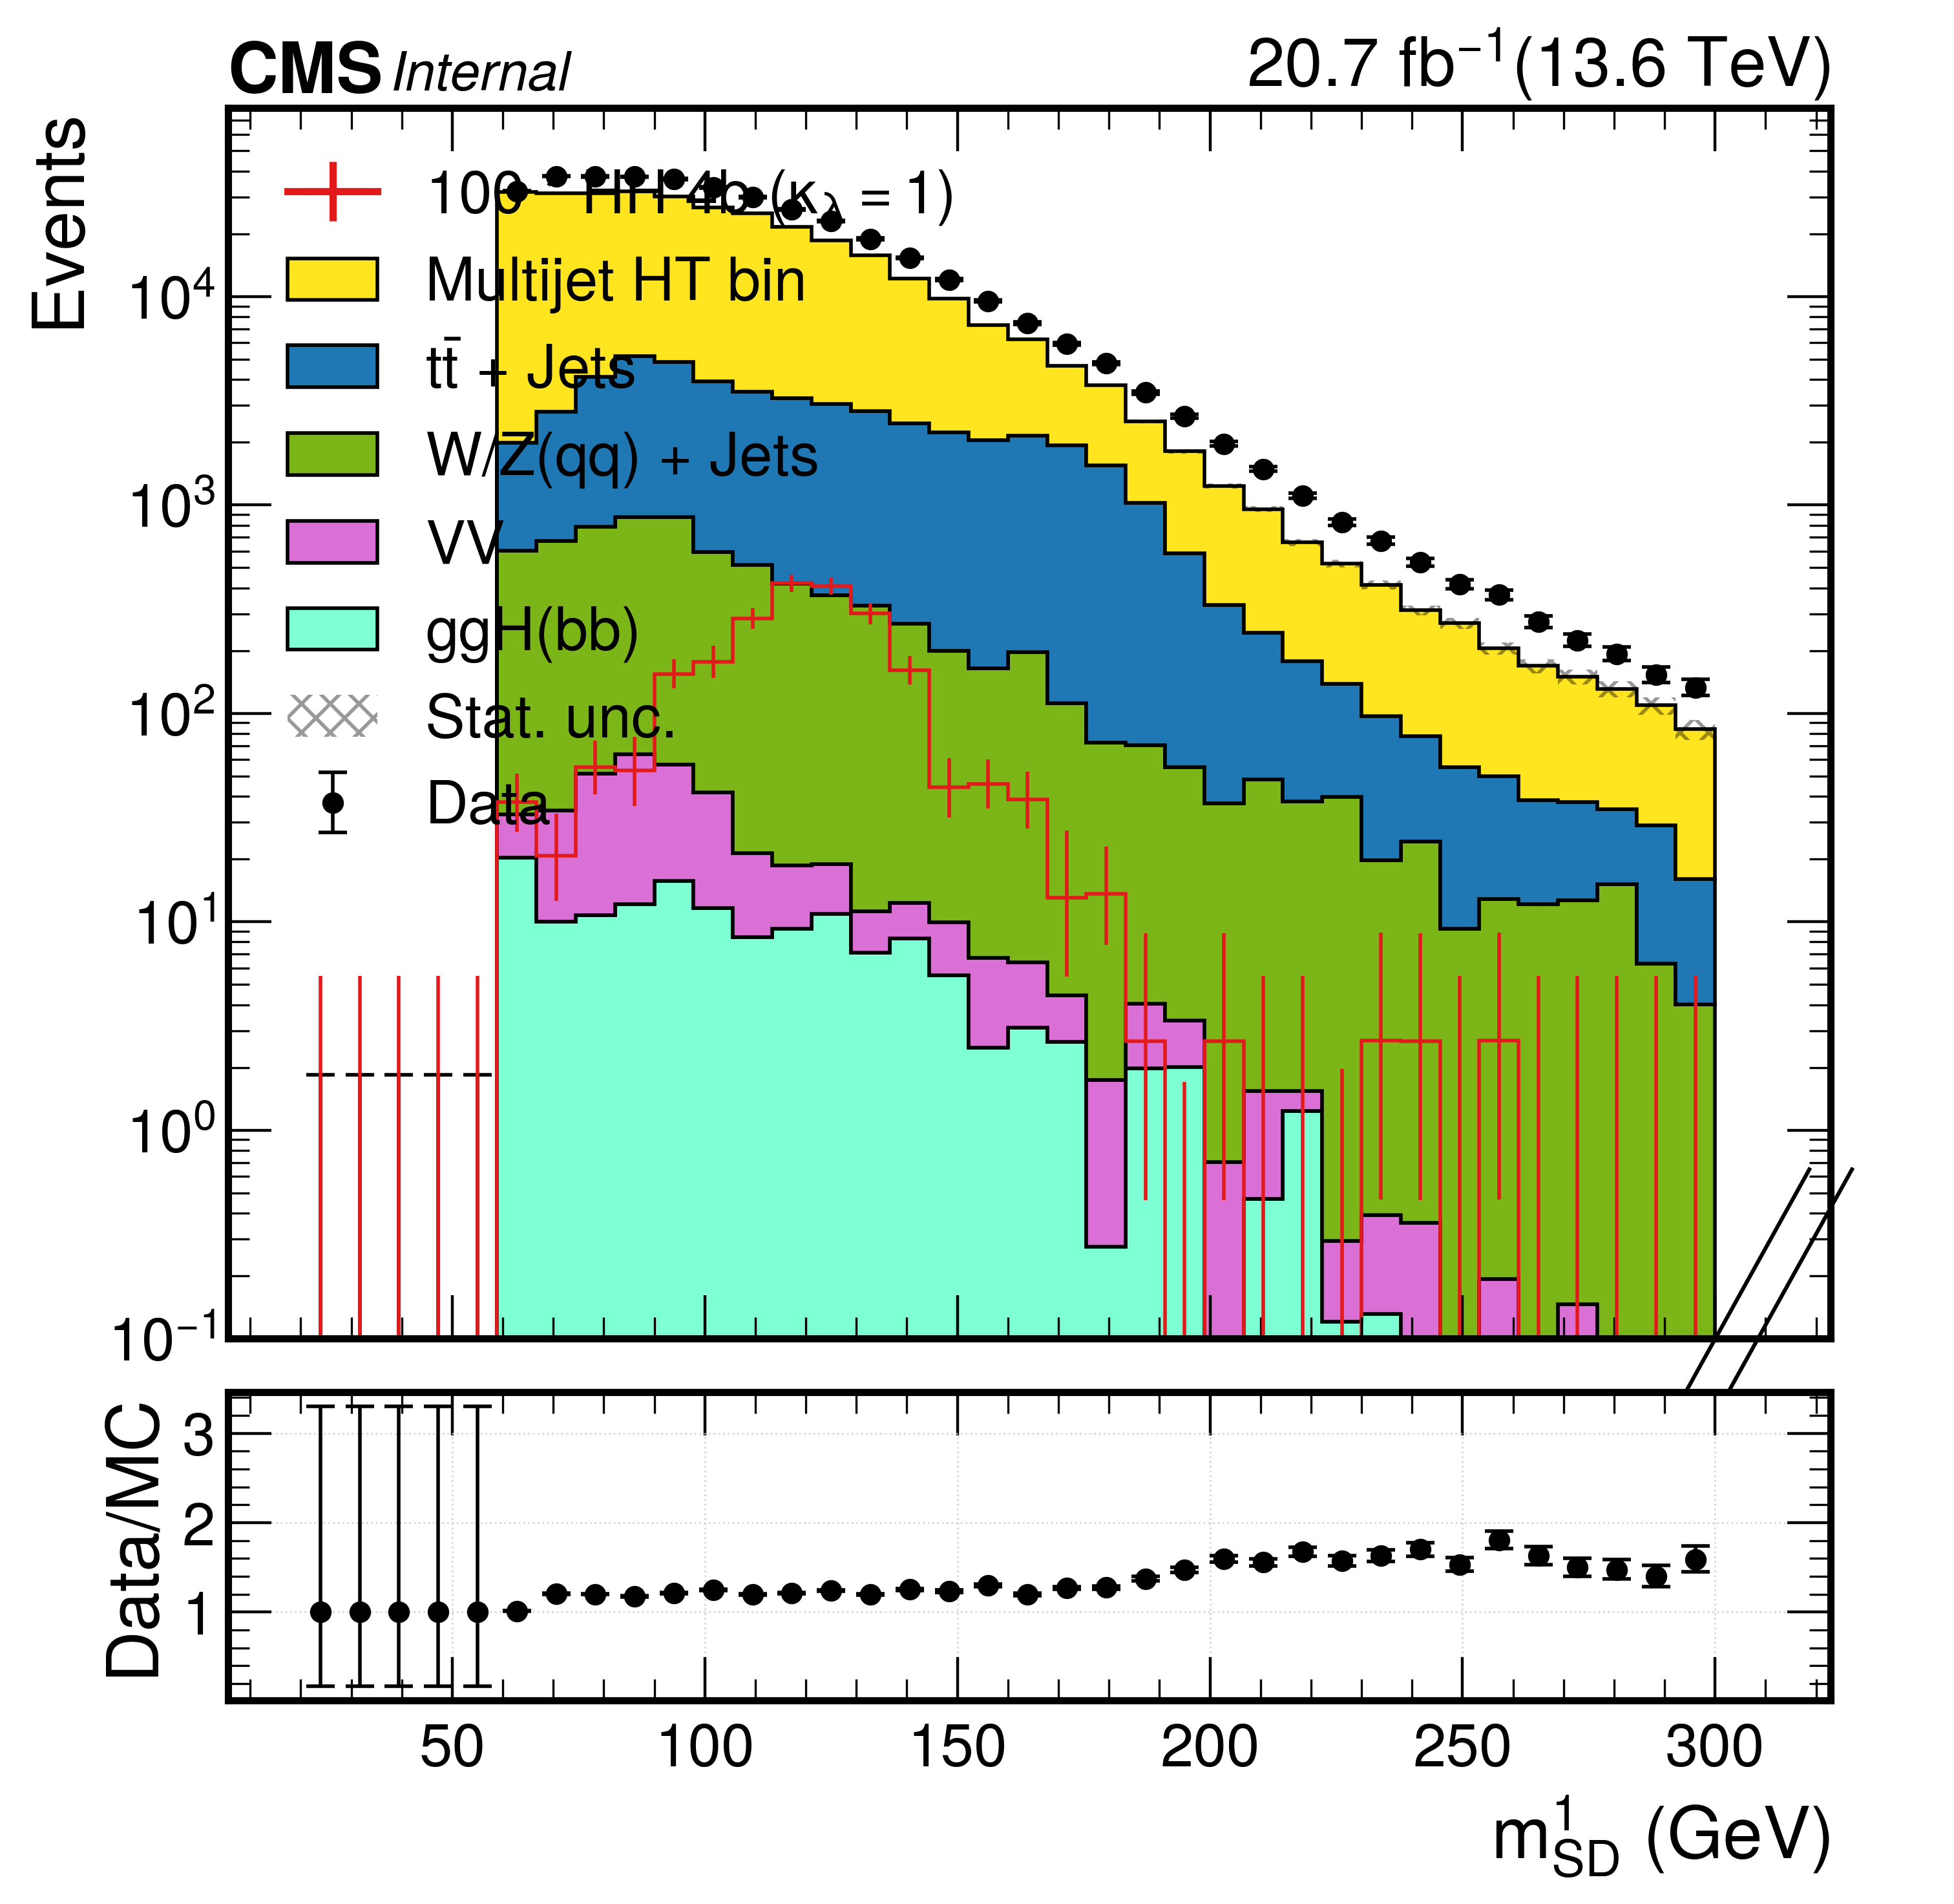

In [11]:
# make a stacked plot
from plotting import plot_hists

plot_hists(
    year,
    hists,
    vars_to_plot,
    20.67,
    add_data=True,
    mult_factor=100,
    logy=True,
    stack=True,
    bbox_to_anchor=None,
)